<a href="https://colab.research.google.com/github/sheikhi-a/Data_science_with_python/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsupervised Classification
###Logistic regression


*Ayyub Sheikhi*

Department of statistics, Shahid Bahonar University of Kerman


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [120, 10],
    [130, 15],
    [140, 42],
    [110, 28],
    [125, 29],
    [135, 41],
    [115, 27],
    [200, 80],
    [220, 85],
    [220, 55],
    [210, 82],
    [230, 90],
    [190, 68],
    [205, 83],
    [215, 88]
])

plt.scatter(data[:,0], data[:,1])

In [ ]:
centroid_indices = np.random.choice(data.shape[0], size=2, replace=False)
centroids = data[centroid_indices]

plt.scatter(data[:,0], data[:,1], color='black')
plt.scatter(centroids[:,0], centroids[:,1],  marker='X',  s=200)


In [ ]:
n_clusters=2
distances = np.zeros((data.shape[0], n_clusters))

dist1_to_centroid0=np.linalg.norm(data[0,:] - centroids[0])
dist1_to_centroid1=np.linalg.norm(data[0,:] - centroids[1])

if dist1_to_centroid0 > dist1_to_centroid1:
        label1 = 0
else:
        label1 = 1


dist15_to_centroid0=np.linalg.norm(data[14,:] - centroids[0])
dist15_to_centroid1=np.linalg.norm(data[14,:] - centroids[1])

if dist15_to_centroid0 > dist15_to_centroid1:
        label15 = 0
else:
        label15 = 1




plt.scatter(data[:,0], data[:,1], color='black')
plt.scatter(centroids[:,0], centroids[:,1],  marker='X',  s=200)
plt.scatter(data[0,0], data[0,1], color='blue')
plt.scatter(data[14,0], data[14,1], color='red')



plt.scatter(data[:,0], data[:,1], color='black')
plt.scatter(centroids[:,0], centroids[:,1],  marker='X',  s=200)
if label1 ==1:
  plt.scatter(data[0,0], data[0,1], color='blue')
else:
  plt.scatter(data[0,0], data[0,1], color='red')

if label15 ==1:
  plt.scatter(data[14,0], data[14,1], color='blue')
else:
  plt.scatter(data[14,0], data[14,1], color='red')



**Run fir all cases**

In [ ]:


for i in range(n_clusters):
    distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)

labels = np.argmin(distances, axis=1)

for i in range(n_clusters):
    if np.any(labels == i):
        centroids[i] = data[labels == i].mean(axis=0)

for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()


**Run for simulated data **

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 50
n_features = 2
n_clusters = 2

data = np.vstack([
    np.random.randn(n_samples // n_clusters, n_features) + np.array([3, 3]),
    np.random.randn(n_samples // n_clusters, n_features) + np.array([7, 7]),
])

centroid_indices = np.random.choice(data.shape[0], size=n_clusters, replace=False)
centroids = data[centroid_indices]

distances = np.zeros((data.shape[0], n_clusters))
for i in range(n_clusters):
    distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)

labels = np.argmin(distances, axis=1)

for i in range(n_clusters):
    if np.any(labels == i):
        centroids[i] = data[labels == i].mean(axis=0)

for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()


In [ ]:
for i in range(n_clusters):
    distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)

labels = np.argmin(distances, axis=1)

for i in range(n_clusters):
    if np.any(labels == i):
        centroids[i] = data[labels == i].mean(axis=0)

for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()


In [ ]:
for i in range(n_clusters):
    distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)

labels = np.argmin(distances, axis=1)

for i in range(n_clusters):
    if np.any(labels == i):
        centroids[i] = data[labels == i].mean(axis=0)

for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()

In [ ]:
max_iters = 100
tolerance = 1e-4

for iteration in range(max_iters):
    distances = np.zeros((data.shape[0], n_clusters))
    for i in range(n_clusters):
        distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)

    labels = np.argmin(distances, axis=1)

    old_centroids = centroids.copy()

    for i in range(n_clusters):
        if np.any(labels == i):  # Avoid empty clusters
            centroids[i] = data[labels == i].mean(axis=0)

    if np.all(np.linalg.norm(centroids - old_centroids, axis=1) < tolerance):
        print(f"Converged after {iteration + 1} iterations.")
        break

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (2 Clusters, 30 Samples)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans


random_state = 42
n_samples = 50
n_features = 2
n_clusters = 2

data = np.vstack([
    np.random.randn(n_samples // n_clusters, n_features) + np.array([3, 3]),
    np.random.randn(n_samples // n_clusters, n_features) + np.array([7, 5]),
])

kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_


for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()

**Run for real dataset**

In [ ]:
import pandas as pd

df=pd.read_csv('Mall_Customers.csv')
df.head()

df.drop('CustomerID',inplace=True,axis=1)
df.columns=['Gender','Age','Annual_Income','Spending_Score']
df.shape

data = df[['Age','Spending_Score']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income')

In [ ]:

data = df[['Annual_Income','Spending_Score']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Income')  # Use column name for x-axis
plt.ylabel('Spending')  # Use column name for y-axis

In [ ]:
df=df[['Annual_Income','Spending_Score']]
df.head()
cluster_no=[i for i in range(1,12)]
WCSS=[]
for i in cluster_no:
    cluster=KMeans(init='k-means++',n_clusters=i,random_state=42)
    cluster.fit(df)
    WCSS.append(cluster.inertia_)
plt.plot(cluster_no,WCSS,marker='o')
plt.xlabel('Cluster Numbers')
plt.ylabel('Within cluster Sum of Sq')

Text(0, 0.5, 'Spending_score')

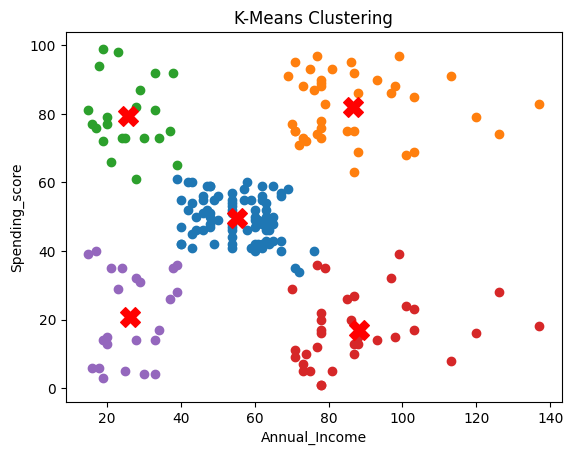

In [ ]:
n_clusters=5


data = df[['Annual_Income','Spending_Score']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_score')

Text(0, 0.5, 'Within cluster Sum of Sq')

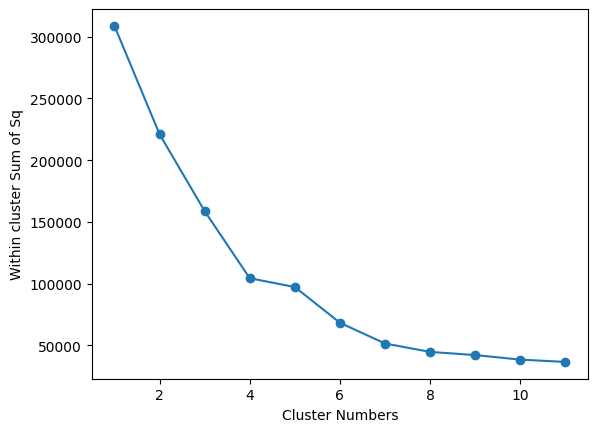

In [ ]:
df=pd.read_csv('Mall_Customers.csv')
df.drop('CustomerID',inplace=True,axis=1)
df.columns=['Gender','Age','Annual_Income','Spending_Score']
df.shape


df=df[['Age','Annual_Income','Spending_Score']]
df.head()
cluster_no=[i for i in range(1,12)]
WCSS=[]
for i in cluster_no:
    cluster=KMeans(init='k-means++',n_clusters=i,random_state=42)
    cluster.fit(df)
    WCSS.append(cluster.inertia_)
plt.plot(cluster_no,WCSS,marker='o')
plt.xlabel('Cluster Numbers')
plt.ylabel('Within cluster Sum of Sq')



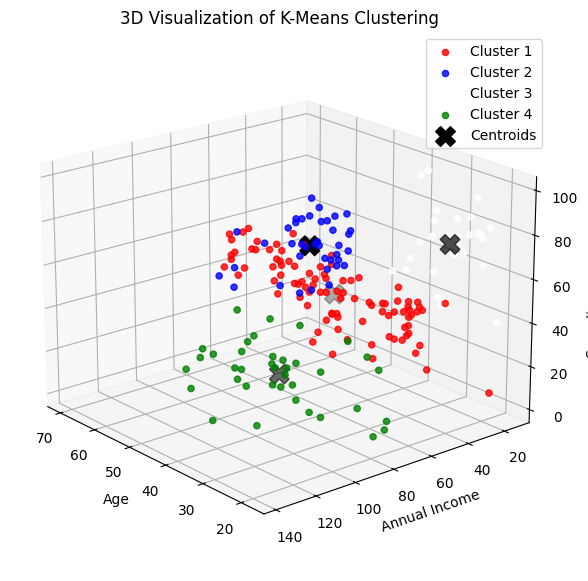

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


data = df[['Age', 'Annual_Income', 'Spending_Score']].values

n_clusters = 4  # Set the number of clusters
random_state = 42
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'white','green' ]

for i in range(n_clusters):
    ax.scatter(
        data[labels == i, 0],  # Age
        data[labels == i, 1],  # Annual Income
        data[labels == i, 2],  # Spending Score
        c=colors[i], label=f'Cluster {i+1}', alpha=0.8
    )

ax.scatter(
    centroids[:, 0],  # Centroid Age
    centroids[:, 1],  # Centroid Annual Income
    centroids[:, 2],  # Centroid Spending Score
    s=200, c='black', marker='X', label='Centroids'
)

ax.view_init(elev=20, azim=45)  # Adjust the elevation and azimuthal angle

ax.set_title('3D Visualization of K-Means Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.view_init(elev=20, azim=140)

ax.legend()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

# Load and preprocess the dataset
df = pd.read_csv('Mall_Customers.csv')
df.drop('CustomerID', inplace=True, axis=1)
df.columns = ['Gender', 'Age', 'Annual_Income', 'Spending_Score']

# Select relevant features for clustering
data = df[['Age', 'Annual_Income', 'Spending_Score']].values

# Perform K-Means clustering
n_clusters = 4
random_state = 42
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)
labels = kmeans.labels_

# Add cluster labels to the DataFrame for visualization
df['Cluster'] = labels

# Create a 3D Scatter Plot with Plotly
fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual_Income',
    z='Spending_Score',
    color='Cluster',
    title='3D Visualization of K-Means Clustering',
    symbol='Cluster',
    opacity=0.7
)

# Show the plot (interactive by default)
fig.show()


In [ ]:
from sklearn.preprocessing import LabelBinarizer
df=pd.read_csv('Mall_Customers.csv')
df.drop('CustomerID',inplace=True,axis=1)
df.columns=['Gender','Age','Annual_Income','Spending_Score']
df.shape

encoder=LabelBinarizer()
df['Gender']=encoder.fit_transform(df['Gender'])

cluster_no=[i for i in range(1,12)]
WCSS=[]
for i in cluster_no:
    cluster=KMeans(init='k-means++',n_clusters=i,random_state=42)
    cluster.fit(df)
    WCSS.append(cluster.inertia_)
plt.plot(cluster_no,WCSS,marker='o')
plt.xlabel('Cluster Numbers')
plt.ylabel('WCSS')